In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
#print("hello world")
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/TS/Downloads/BanglaSignLanguage/Train'
valid_path = 'C:/Users/TS/Downloads/BanglaSignLanguage/Test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('C:/Users/TS/Downloads/BanglaSignLanguage/Train/*')

In [8]:
folders

['C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ca',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\cha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ga',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\gha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ja',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\jha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ka',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\kha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\neo',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\umo']

In [9]:
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/TS/Downloads/BanglaSignLanguage/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1213 images belonging to 10 classes.


In [15]:
test_set = test_datagen.flow_from_directory('C:/Users/TS/Downloads/BanglaSignLanguage/Test/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 200 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=200,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\TS\AppData\Local\Temp/ipykernel_11312/3131283027.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/200
17/76 [=====>........................] - ETA: 5:20 - loss: 3.6410 - accuracy: 0.1581

In [17]:
from tensorflow.keras.models import load_model
model.save('model_vgg16_BanglaSignLanguage_200epoch_datasetv2_.h5')

In [18]:
y_pred=model.predict(test_set)

In [19]:
y_pred

array([[8.7088256e-06, 9.9981779e-01, 3.0901123e-07, ..., 2.6457734e-09,
        1.6863535e-04, 3.0108822e-07],
       [7.0078731e-06, 4.5613739e-05, 2.7541375e-07, ..., 3.0148949e-02,
        8.7448978e-01, 2.9746654e-02],
       [5.3219173e-06, 6.8352536e-05, 3.6712137e-08, ..., 2.6227675e-02,
        8.0481619e-01, 1.3799982e-01],
       ...,
       [5.6481303e-04, 1.7937491e-06, 6.2747035e-06, ..., 5.8093260e-04,
        1.2476590e-03, 9.9721104e-01],
       [1.8527522e-06, 5.1921376e-07, 1.3711166e-07, ..., 9.3560149e-05,
        8.7094944e-05, 1.5757162e-02],
       [1.7634023e-02, 1.1556003e-04, 7.6395082e-07, ..., 4.1668760e-03,
        9.6873808e-01, 8.4507605e-03]], dtype=float32)

In [20]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [21]:
y_pred

array([1, 8, 8, 8, 5, 7, 6, 3, 3, 6, 8, 4, 7, 6, 3, 1, 0, 0, 2, 0, 4, 0,
       0, 4, 2, 7, 7, 7, 9, 5, 8, 1, 6, 3, 5, 3, 4, 3, 8, 6, 4, 8, 5, 4,
       8, 8, 7, 5, 8, 7, 8, 2, 4, 8, 6, 4, 7, 6, 8, 9, 4, 3, 9, 3, 5, 4,
       5, 3, 3, 5, 6, 5, 8, 6, 9, 6, 2, 7, 2, 3, 7, 6, 7, 6, 2, 8, 2, 5,
       5, 0, 5, 9, 1, 0, 0, 8, 6, 6, 0, 8, 1, 2, 5, 2, 2, 0, 9, 3, 6, 7,
       9, 5, 8, 1, 4, 8, 9, 5, 2, 4, 8, 3, 6, 1, 5, 0, 6, 9, 8, 8, 8, 5,
       1, 6, 2, 4, 4, 5, 3, 6, 5, 3, 7, 5, 6, 4, 7, 7, 8, 2, 8, 5, 2, 2,
       0, 2, 9, 7, 9, 7, 5, 0, 2, 8, 7, 8, 7, 6, 5, 5, 8, 2, 3, 2, 3, 7,
       6, 0, 9, 7, 5, 5, 7, 0, 7, 4, 4, 3, 7, 2, 8, 3, 5, 3, 8, 5, 3, 9,
       4, 8], dtype=int64)

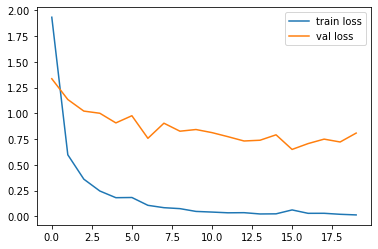

<Figure size 432x288 with 0 Axes>

In [22]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

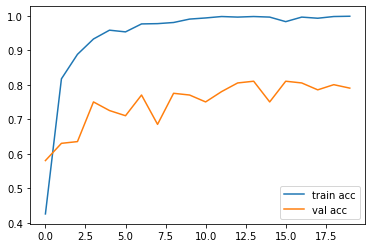

<Figure size 432x288 with 0 Axes>

In [23]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
##import tensorflow as tf

##from tensorflow.keras.models import load_model
##from tensorflow.keras.preprocessing import image

##model.save('model_vgg16_cell_v2.h5')